#**FINAL PROJECT  GLOBAL WARMING**

## Predict Global Warming
## MENTOR: Diego Alfaro
## By: ADRIAN AGUILAR


** Install Libraries**
    


In [0]:
#!pip install pystan 
#!pip install ssl
#!pip uninstall fbprophet 
#!pip install fbprophet
#conda install -c conda -forget fbprophet
#!pip install plotly
#!pip install sklearn
#!pip install fbprophet
#!pip install --user --upgrade pip


In [22]:
import sys
print(sys.executable)


/usr/bin/python3


**Import Libraries**

In [2]:
#Imports 
##import import ssl
import math
import seaborn as sns 
%matplotlib inline
import numpy as np
import pandas as pd

#map
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR, SVC
from sklearn import svm 
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

#model metrics 
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline

#GradientBoostingClassifier 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from math import sqrt

# PROPHET
import fbprophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
import pandas as pd
from fbprophet import Prophet
import os



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2 Data reading


In [4]:
#df = pd.read_csv('/home/adrian/Documents/Cenfotec/GLOBAL/data/GLBTS.csv', header =0)
#dfmatrix = pd.read_csv('/home/adrian/Documents/Cenfotec/GLOBAL/data/GLB.csv', header =0)

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['GLBTS.csv']), sep=';')


Saving GLBTS.csv to GLBTS.csv


In [0]:
#In order to check the data types of each variable you can use the info() function of Pandas as follows:
df.head()


,ds,y
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.19
4,1880-05-31,-0.11


# 2 Data Clean Up

In [5]:
df.columns

Index(['ds', 'y'], dtype='object')

In [6]:
df.head()

,ds,y
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.19
4,1880-05-31,-0.11


In [7]:
df.isnull().sum()


ds    0
y     0
dtype: int64

In [8]:
#In order to check the data types of each variable you can use the info() function of Pandas as follows:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1680 non-null   object 
 1   y       1680 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.4+ KB


# **PROPHET**

In [11]:
df.head()


,ds,y
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.19
4,1880-05-31,-0.11


In [0]:
df.columns

Index(['ds', 'y'], dtype='object')

###  **Fit Model**

In [12]:
# Python
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### **Future**
1. Made on a dataframe with a column ds containing the dates 
We use make_future_dataframe() 
2. Specify the ###number of days to extend into the future.  List item By default it includes dates from the history




In [14]:

future = m.make_future_dataframe(periods=365)
future.tail(2)



,ds
2043,2020-12-29
2044,2020-12-30


Total number of rows in original dataset was 2044 and we see that the future data frame that we created for prediction contains historical dates as well as additional 365 dates.

##**FORECAST**

In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2040,2020-12-26,0.781441,0.589584,0.950574
2041,2020-12-27,0.793573,0.591872,0.972396
2042,2020-12-28,0.807763,0.603066,0.988237
2043,2020-12-29,0.823943,0.650704,1.008082
2044,2020-12-30,0.842006,0.656602,1.036731


In [0]:
future.to_csv('prediction.csv')

**Plotting the predicted data**

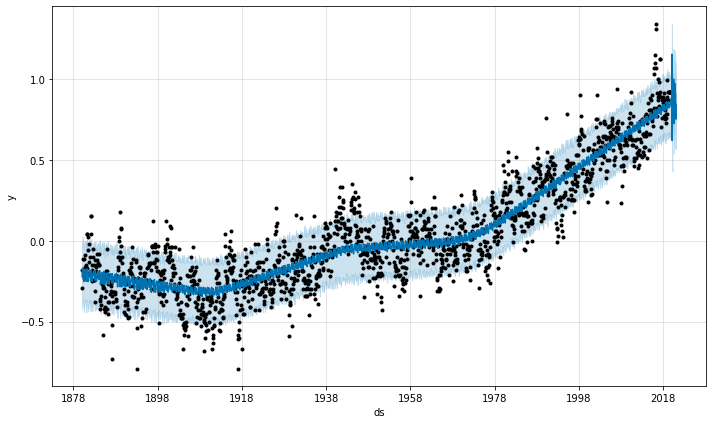

In [18]:
fig1a =m.plot(forecast)

**Plot Components**
Plotting the forecasted components
We can plot the trend and seasonality, components of the forecast.

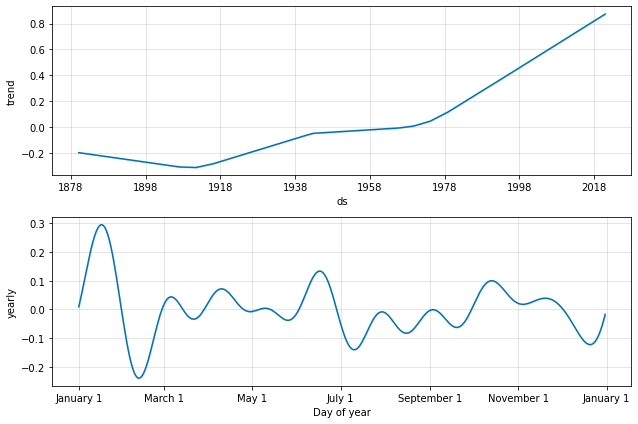

In [19]:
fig1a =m.plot_components(forecast)

**Adding ChangePoints **
Prophet Changepoints are the datetime points where the time series have abrupt changes in the trajectory. 


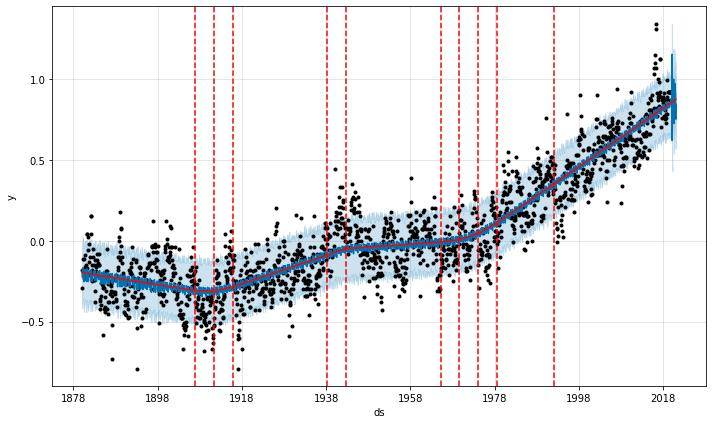

In [23]:
from fbprophet.plot import add_changepoints_to_plot
figcp = m.plot(forecast)
a = add_changepoints_to_plot(figcp.gca(), m, forecast)

View chagepoints occurred

In [24]:
m.changepoints

54     1884-07-31
107    1888-12-31
161    1893-06-30
215    1897-12-31
269    1902-06-30
322    1906-11-30
376    1911-05-31
430    1915-11-30
483    1920-04-30
537    1924-10-31
591    1929-04-30
645    1933-10-31
698    1938-03-31
752    1942-09-30
806    1947-03-31
860    1951-09-30
913    1956-02-29
967    1960-08-31
1021   1965-02-28
1074   1969-07-31
1128   1974-01-31
1182   1978-07-31
1236   1983-01-31
1289   1987-06-30
1343   1991-12-31
Name: ds, dtype: datetime64[ns]

### Forecast 


** Predicted Value Y-hat **
Y-hat () is the symbol that represents the predicted equation for a line of best fit in linear regression. The equation takes the form  where b is the slope and a is the y-intercept. It is used to differentiate between the predicted (or fitted) data and the observed data y.
 Y-hat is also used in calculating the residuals of , which are the vertical differences between the observed and fitted values. 
 The matrix of values relating the observed and fitted values is known as the hat matrix (H) as it puts a hat on y.

The predict method will assign each row in future a predicted value which it names yhat. 
If you pass in historical dates, it will provide an in-sample fit.
The forecast object here is a new dataframe that includes a column yhat with the forecast,
as well as columns for components and uncertainty intervals.



In [25]:


# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()






,ds,yhat,yhat_lower,yhat_upper
2040,2020-12-26,0.781441,0.590931,0.960723
2041,2020-12-27,0.793573,0.614354,0.987626
2042,2020-12-28,0.807763,0.618396,0.977285
2043,2020-12-29,0.823943,0.643754,1.004697
2044,2020-12-30,0.842006,0.653192,1.029360


plot forecast


In [0]:
forecast.to_csv('/content/forecast.csv')

### PLot forecast

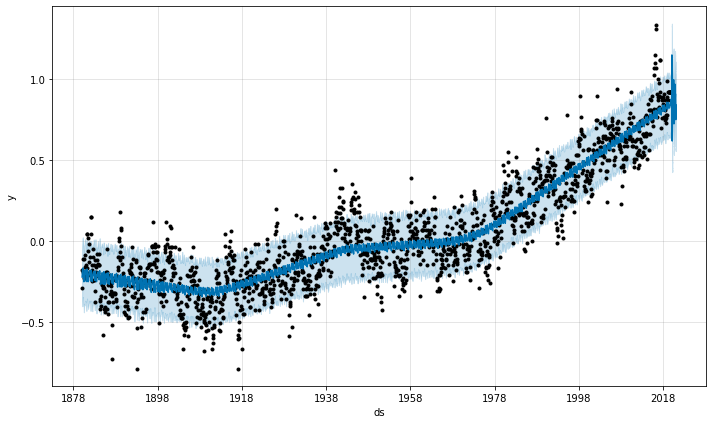

In [27]:
# Python
fig1 = m.plot(forecast)


### Forecast Componets 

The forecast and component visualizations show that Prophet was able to accurately model the underlying trend in the data, while also accurately modeling weekly and yearly seasonality (e.g. lower order volume on weekend and holidays).

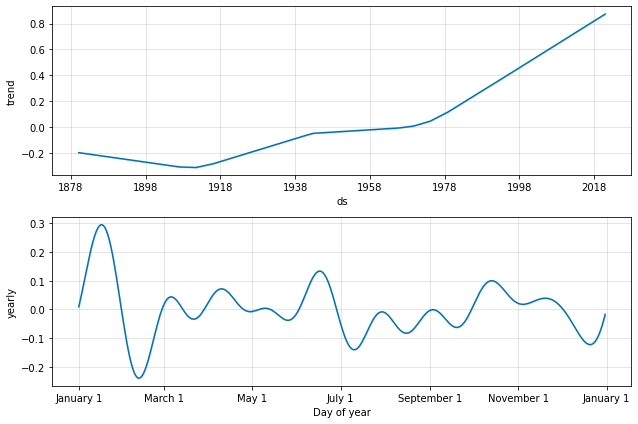

In [28]:
fig2 = m.plot_components(forecast)


**Diagnostics**


Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values. This figure illustrates a simulated historical forecast on the Peyton Manning dataset, where the model was fit to a initial history of 5 years, and a forecast was made on a one year horizon.

In [29]:
# Python
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 278 forecasts with cutoffs between 1882-06-27 00:00:00 and 2018-12-31 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1882-06-30,-0.083244,-0.161977,-0.007880,-0.25,1882-06-27
1,1882-07-31,0.145633,0.068657,0.220066,-0.20,1882-06-27
2,1882-08-31,0.103422,0.025386,0.177268,-0.05,1882-06-27
3,1882-09-30,-0.057343,-0.136467,0.020422,-0.10,1882-06-27
4,1882-10-31,-0.138932,-0.220936,-0.054197,-0.24,1882-06-27


In [0]:
df_cv.to_csv('/content/cross_validation.csv')


**Perfomance**

The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window, but this can be changed with the rolling_window argument.

In [31]:
# Python
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,0.024903,0.157806,0.122081,0.455028,0.760761
1,38 days,0.024891,0.157767,0.122358,0.455028,0.757883
2,39 days,0.024904,0.157809,0.123004,0.455028,0.762763
3,40 days,0.025501,0.159690,0.124403,0.454323,0.752853
4,41 days,0.025393,0.159351,0.124114,0.446429,0.751952


In [0]:
df_p.to_csv('/content/performance.csv')

**MSE**

Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots. We see for this forecast that errors around 5% are typical for predictions one month into the future, and that errors increase up to around 11% for predictions that are a year out.



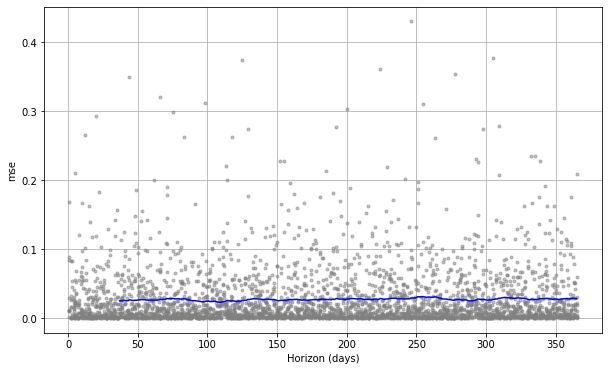

In [34]:
# Python
from fbprophet.plot import plot_cross_validation_metric
#fig = plot_cross_validation_metric(df_cv, metric='mape')
fig = plot_cross_validation_metric(df_cv, metric='mse')



**rmse**

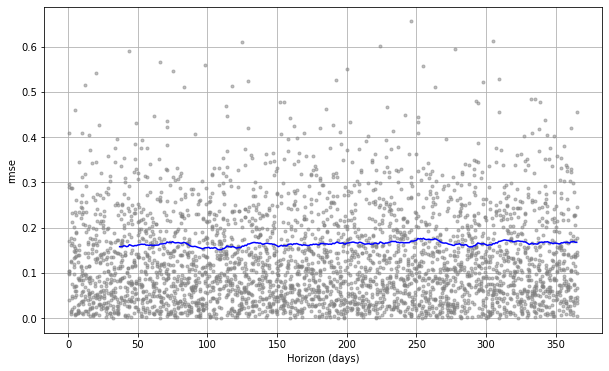

In [35]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

**mae**

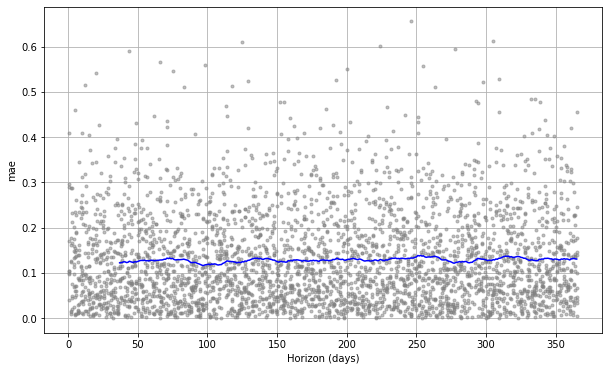

In [140]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

**coverage**


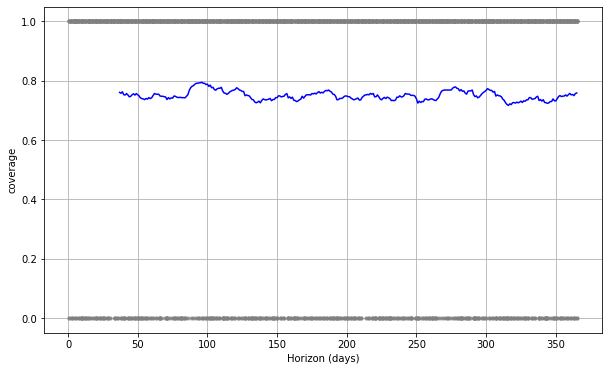

In [141]:
fig = plot_cross_validation_metric(df_cv, metric='coverage')

**Results**
Cloning DF

In [41]:
forecast_rp = forecast.copy()
forecast_rp.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2040,2020-12-26,0.873574,0.590931,0.960723,0.873574,0.873574,-0.092133,-0.092133,-0.092133,-0.092133,-0.092133,-0.092133,0.0,0.0,0.0,0.781441
2041,2020-12-27,0.873623,0.614354,0.987626,0.873623,0.873623,-0.080050,-0.080050,-0.080050,-0.080050,-0.080050,-0.080050,0.0,0.0,0.0,0.793573
2042,2020-12-28,0.873673,0.618396,0.977285,0.873673,0.873673,-0.065910,-0.065910,-0.065910,-0.065910,-0.065910,-0.065910,0.0,0.0,0.0,0.807763
2043,2020-12-29,0.873722,0.643754,1.004697,0.873722,0.873722,-0.049779,-0.049779,-0.049779,-0.049779,-0.049779,-0.049779,0.0,0.0,0.0,0.823943
2044,2020-12-30,0.873772,0.653192,1.029360,0.873772,0.873772,-0.031765,-0.031765,-0.031765,-0.031765,-0.031765,-0.031765,0.0,0.0,0.0,0.842006


**Fiter Dates for Year 2020** 

In [137]:
start_date = "2020-1-1"
end_date = "2020-1-31"
after_start_date = forecast_rp["ds"] >= start_date
before_end_date = forecast_rp["ds"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = forecast_rp.loc[between_two_dates]
filtered_dates.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

**Filtering Columns**

In [138]:


#filtered_dates.set_index("ds", inplace=True)
ds_final = filtered_dates.drop(['trend','yhat_lower','yhat_upper','trend_lower','trend_upper','additive_terms','additive_terms_lower','additive_terms_upper','yearly','yearly_lower','yearly_upper','multiplicative_terms','multiplicative_terms_lower','multiplicative_terms_upper'], axis=1)
ds_final.head()



,ds,yhat
1680,2020-01-01,0.848924
1681,2020-01-02,0.870610
1682,2020-01-03,0.893541
1683,2020-01-04,0.917435
1684,2020-01-05,0.941979


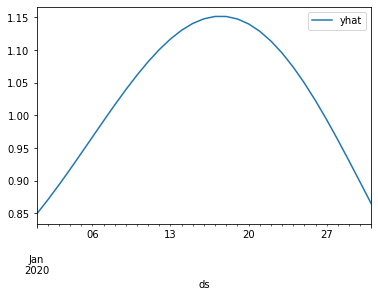

In [139]:
ds_final.plot(x='ds', y='yhat')




In [0]:
ds_final.to_csv('/content/filtered_dates.csv')